<a href="https://colab.research.google.com/github/Wanyoike16/Project-1/blob/main/MODEL_DEVELOPMENT_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Developing prediction models**

We use model developemntt to help us predict future observations from the data we have.

In [6]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# we now load the data and store it in dataframe df
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


**Linear Regression and Multiple Linear Regression**

In [8]:
#lets laod the modulles for linear regression
from sklearn.linear_model import LinearRegression

In [9]:
# we create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

How could 'highway-mpg' help us predic car price

In [10]:
#we will create a linear function with 'highway-mpg' as the prdictor variable and the price as the response variable
X = df[['highway-mpg']]
Y= df['price']

In [11]:
#we fit the linear model using highway-mpg
lm.fit(X,Y)

LinearRegression()

In [12]:
# we output a prediction
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

What is the value of the intercept (a)?

In [13]:
lm.intercept_

38423.3058581574

In [15]:
#the value of the slobe (b)
lm.coef_

array([-821.73337832])

The final linear model we get is:  Price = 38423.31-821.73 x highway-mpg

In [16]:
#lets create a linear regression object called 'lm1'
lm1 = LinearRegression()
lm1

LinearRegression()

In [17]:
# lets train the model using 'engine-size' as the independent variable and 'price' as the dependent variable
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [18]:
#we find the slope and the intercept of the model
lm1.coef_

array([[166.86001569]])

In [19]:
#then we find the intercept
lm1.intercept_

array([-7963.33890628])

In [23]:
#lets find the equation of the predicted line
 Yhat= -7963.34 + 166.86 * X

 Price= -7963.34 + 166.86 * engine-size

IndentationError: unexpected indent (<ipython-input-23-40bd62e92e4b>, line 2)

Muiltiple Linear Regression

In [21]:
# we develop a model using, horsepower, curb-weight, engine-size, highway-mpg variables as predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [22]:
#lets fit the linear model using the four above variables
lm.fit(Z, df['price'])

LinearRegression()

In [24]:
#value of intercept a
lm.intercept_

-15806.62462632922

In [25]:
#vale of coeficients, b1,b2,b3,b4
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

the linear function we get is:  Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [26]:
#lets create a multiple linear Regression model 'lm2; where the resposne variable is 'price' and the predictor variable is 'normalized-losses' and 'highway-mpg'
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']], df['price'])

LinearRegression()

In [27]:
#we find the coef of the model
lm2.coef_

array([   1.49789586, -820.45434016])

In [28]:
#intercept a
lm2.intercept_

38201.31327245728

**Model Evaluation Using Visualization**

In [29]:
#lets imprt the visualization package seaborn
import seaborn as sns
%matplotlib inline

Regression plot

(0.0, 48168.611038226976)

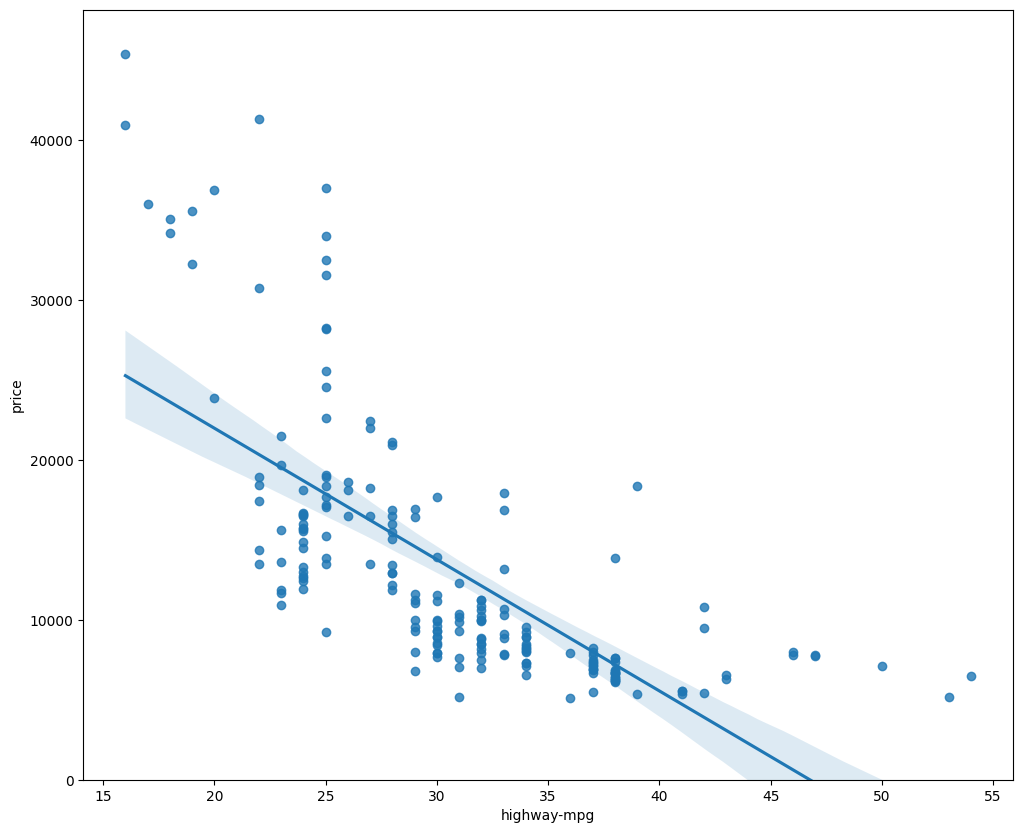

In [30]:
#lets visuailze highway-mpg as potentail predictor varaible of price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

from this plot we see that price is negatively correlated to highway-mpg.
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data

(0.0, 47414.1)

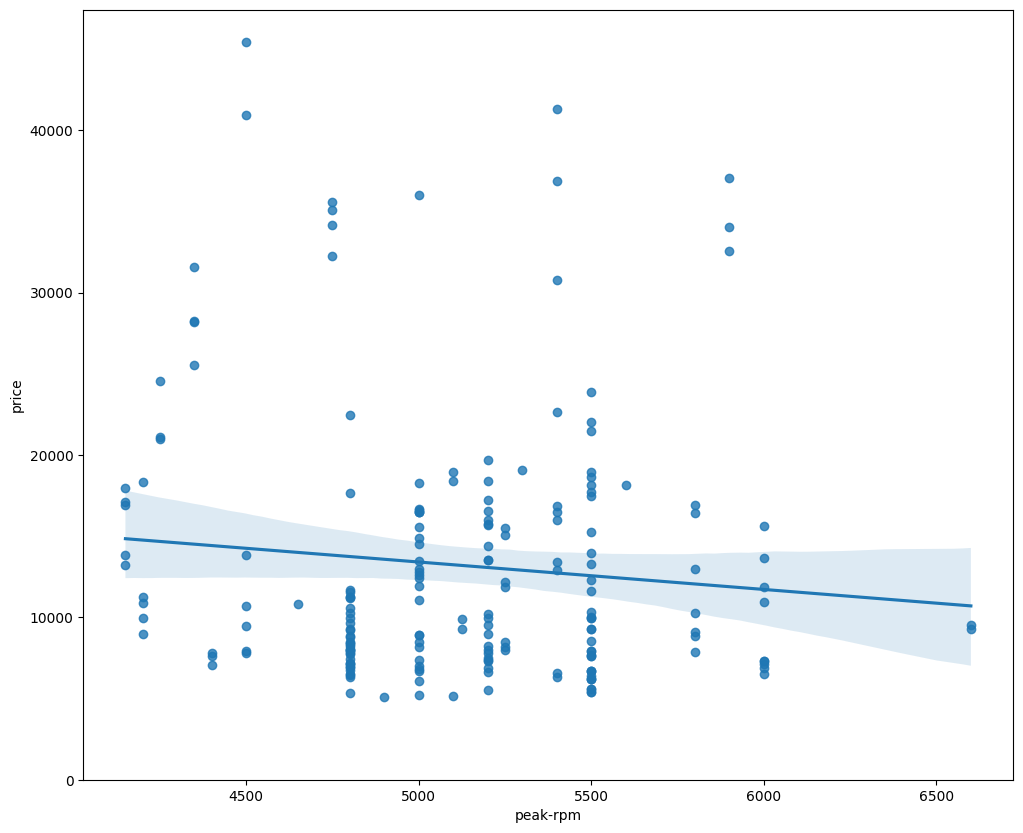

In [31]:
#lets comapre the above plot with the regression plot of 'peak-rpm'
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

In [32]:
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. we can verify it using the following command:

df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


**Residual Plot`**
*If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.*

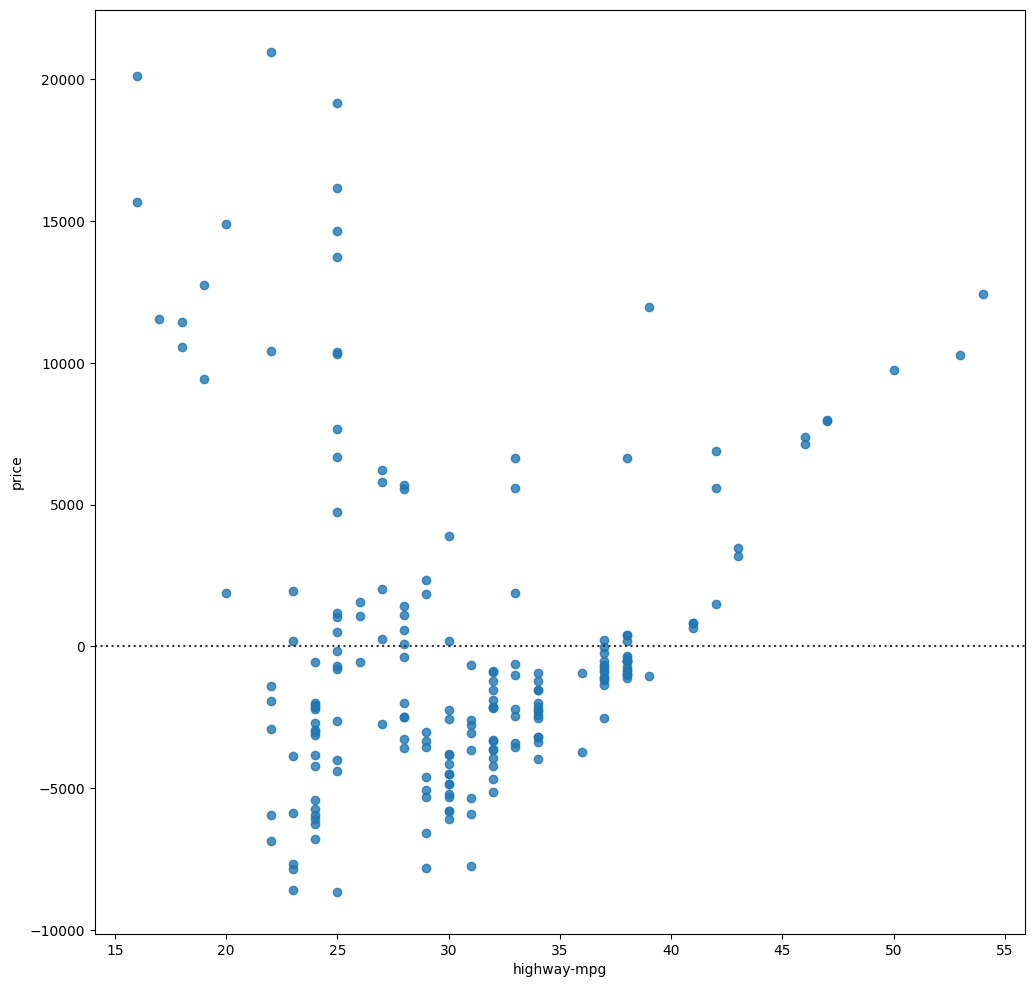

In [33]:
width = 12
height =12
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

*We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.*

**Multiple Linear regression**

In [34]:
#lets make a prediction
Y_hat = lm.predict(Z)

<ipython-input-36-4ce366f857ec>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(df['price'], hist=False,color="r",label="Actual Value")


TypeError: distplot() got an unexpected keyword argument 'colr'

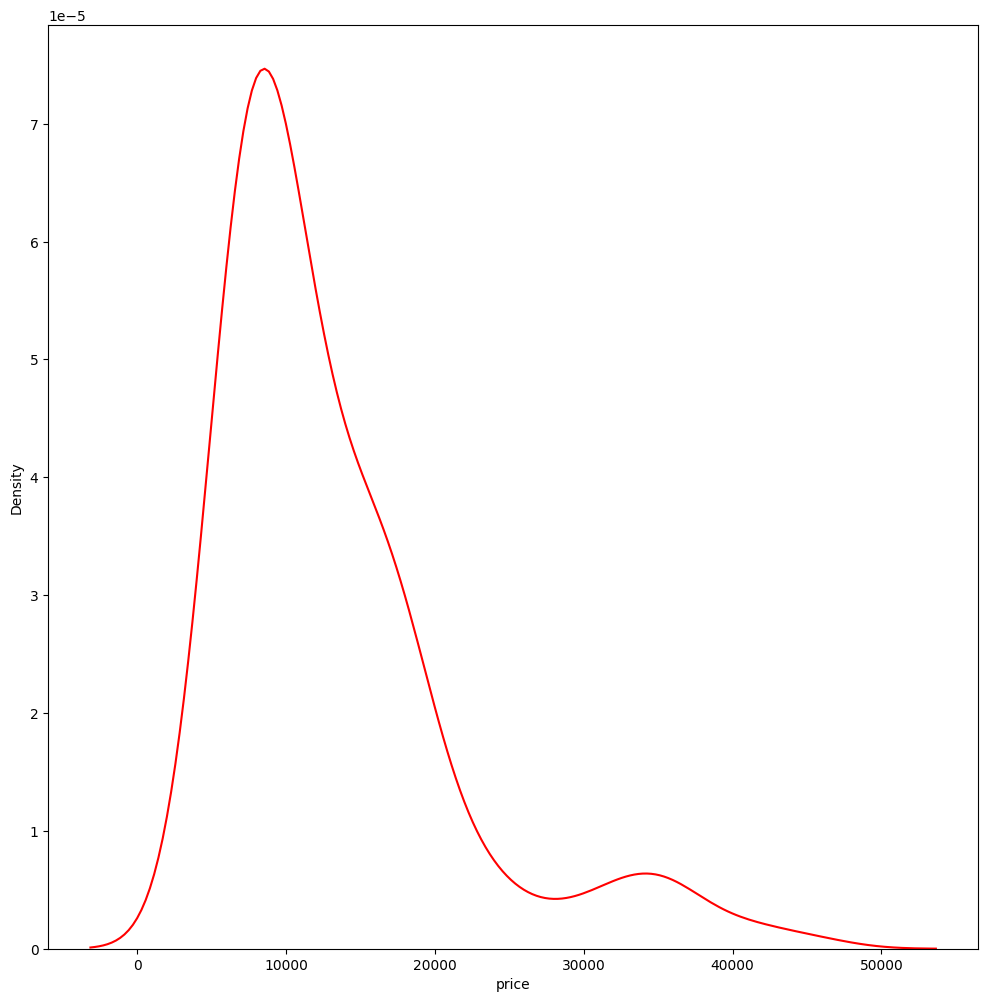

In [36]:
plt.figure(figsize=(width, height))

ax1= sns.distplot(df['price'], hist=False,color="r",label="Actual Value")
sns.distplot(Y_hat, hist=False, colr="b", label="Fitted Values", ax=ax1)

plt.title('actual vs fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proprtiion of cars')

plt.show()
plt.close()

*We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.*

**Polynomial Regression and Pipelines**

In [37]:
def PlotPolly(model, independent_variable, dependent_variable, name):
  x_new = np.linspace(15, 55, 100)
  y_new = model(x_new)

  plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
  plt.title('Polynomial Fit with Matplotlib for Price ~ length')
  ax = plt.gca()
  ax.set_faceclor((0.898, 0.898, 0.898))
  fig = plt.gcf()
  plt.xlabel('Price of Cars')

  plt.show()
  plt.close()


In [38]:
# we get the variables
x = df['highway-mpg']
y = df['price']

In [39]:
# we fit the polynomial using the function ployfit, the use ply1d to dsiaply the polynomail function
# we use a polynomial of the 3rd order(cubic)
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


AttributeError: 'Axes' object has no attribute 'set_faceclor'

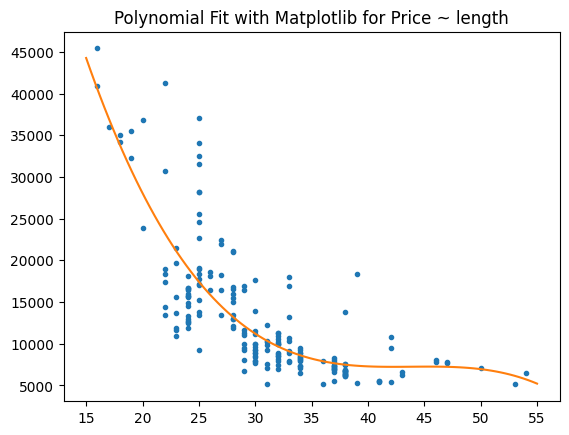

In [40]:
#the we plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [41]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [42]:
# we can create 11 order polynommial model with the varaibles x and y from above

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


AttributeError: 'Axes' object has no attribute 'set_faceclor'

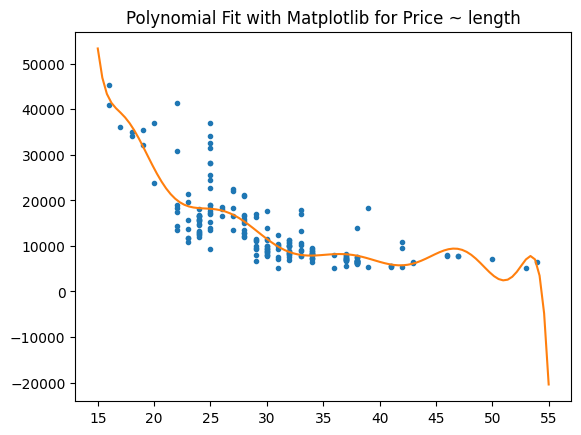

In [43]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [44]:
# we can perfom a polynomial transform on multiple features, we fisrt import the module
from sklearn.preprocessing import PolynomialFeatures

In [45]:
#we create a polynomialFeatures object of degree 2
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [46]:
z_pr=pr.fit_transform(Z)

In [47]:
#in the original data, there are 201 samples and 4 feature
Z.shape

(201, 4)

In [48]:
#after the transformation there are 201 samples and 15 features
z_pr.shape

(201, 15)

**PIPELINE**

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [54]:
#we create the pipeline by creating a lsit of tuples including the name of the model or estimator and its corresponding constructor

Input= [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [55]:
# we input the lsit as an arguement to the pipeline constructor
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [56]:
# we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs then, we can normalize the data, perform a transform and fit the model simultaneously

Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [57]:
#we can also normalize the dat, perfom a transform and produce a prediction simultaneosly
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

**Measures for In-Sample Evaluation**


Model 1: Simple Linear Regression

In [58]:
#lets calaculate the R^2
lm.fit(X, Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [59]:
#lets calculate the MSE
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [60]:
#lets import the function mean_squared_error fromthe module metreics
from sklearn.metrics import mean_squared_error

In [61]:
#lets comapre the predicted results with the actual results
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


Model 2: Multiple Linear Regression

In [62]:
#let's calculate the R^2
lm.fit(Z, df['price'])
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [63]:
#let's now calcualte the MSE

Y_predict_multifit = lm.predict(Z)

In [64]:
#let's comapre the predicted results with the actaual results
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


**Model 3: Polynomial Fit**


In [65]:
#lets calculate the R^2
#we impor the function r2_score from the module metrics
from sklearn.metrics import r2_score

In [66]:
#then we apply the function to get the value of R^2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [67]:
#we can also calculate the MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

**Prediction and Decision Making**

In [68]:
#import pyplot for plotting
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [69]:
#lets create a new input
new_input=np.arange(1, 100, 1).reshape(-1,1)

In [70]:
#lets fit the model
lm.fit(X, Y)
lm

LinearRegression()

In [71]:
#then we prodeuce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

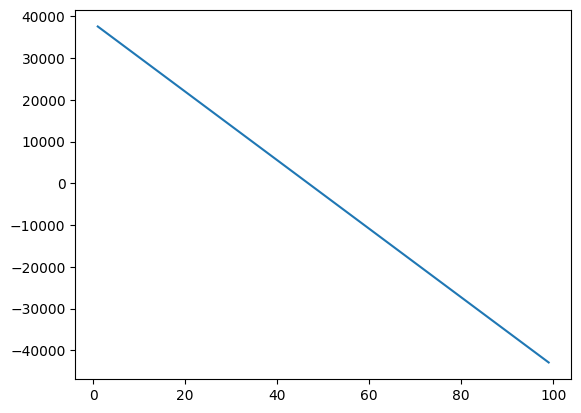

In [72]:
# we plot the data
plt.plot(new_input, yhat)
plt.show()

**MODEL EVALUATION AND REFINEMENT**

In [73]:
#install libraries
%pip install pandas matplotlib scipy scikit-learn seaborn ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.2 MB/s eta 0:00:00


In [75]:
import pandas as pd
import numpy as np

#lets import clean data
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [76]:
df.to_csv('module_5_auto.csv')

In [77]:
#lets use only numeric data
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [78]:
#libraries for plotting
from ipywidgets import interact, interactive, fixed, interact_manual

**Functions For Plotting**

In [79]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [80]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))


    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

**We Train and Test**

In [81]:
#We will place the target data price in a separate dataframe y_data
y_data = df['price']

In [82]:
#we drop price data in dataframe x_data
x_data=df.drop('price', axis=1)

In [83]:
#we randomly split our data into training and testing data using the function train_test_split
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


In [84]:
# we use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [85]:
#lets import Linear Regression from the module linear_model
from sklearn.linear_model import LinearRegression

In [86]:
#we then create a Linear Regression object
lre=LinearRegression()

In [87]:
#we fit the model using the feature "horsepower"
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [88]:
#we calculte the R^2 on the test data
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

We can see the R^2 is much smaller using the test data comapred to the training data

In [89]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [90]:
#lets find the R^2 on the test data using 40% of the dataset for testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4,random_state=0)
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

**Cross-Validation Score**

In [91]:
#let's import cross_val_score from the module model_selection
from sklearn.model_selection import cross_val_score

In [92]:
#we then imput the object, the feature9'horsepower' and the target data 'y_data.
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [93]:
#rgw dafualt scoring is r^2
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [94]:
#we can calulate the average and standard deviation of our  estimate
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [95]:
#we can use negative squared error as a score b setting the parameter 'coring' metric to neg_mean-squared_error
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4, scoring= 'neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [96]:
#lets calculate the average R^2 using two folds, the find the average r^2 fpr the 2nd fold utilizing the 'horsepower' feature
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

In [97]:
#we can also use the finction 'cros_val_predict' to predict the output
from sklearn.model_selection import cross_val_predict

In [98]:
#we input the object, the feature 'horsepower' and the target data y_data
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

**Overfitting, Underfitting and Model Selection**

In [99]:
#Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)


LinearRegression()

In [100]:
#Prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [101]:
#Prediction using test data:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [102]:
#we perform some model evaluation using our training and testing data separately.
#we first import the seaborn and matplotlib library for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

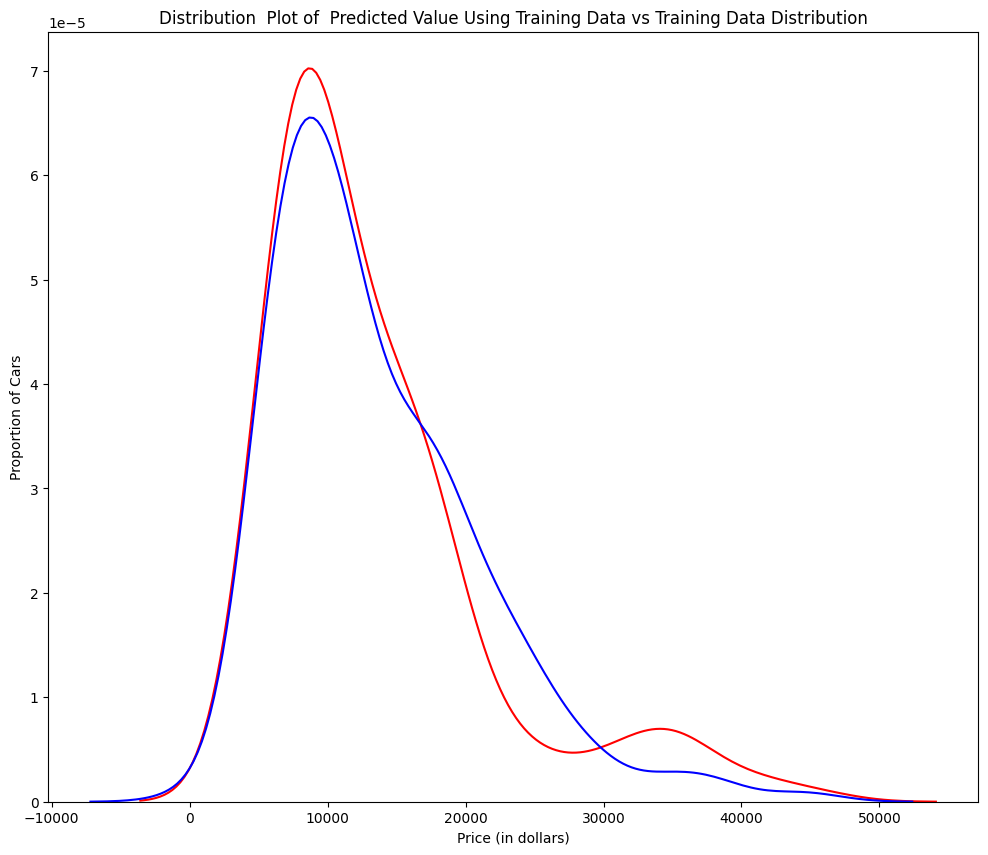

In [103]:
#we then examine the distribution of the predicted values of the training data.
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

We see, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

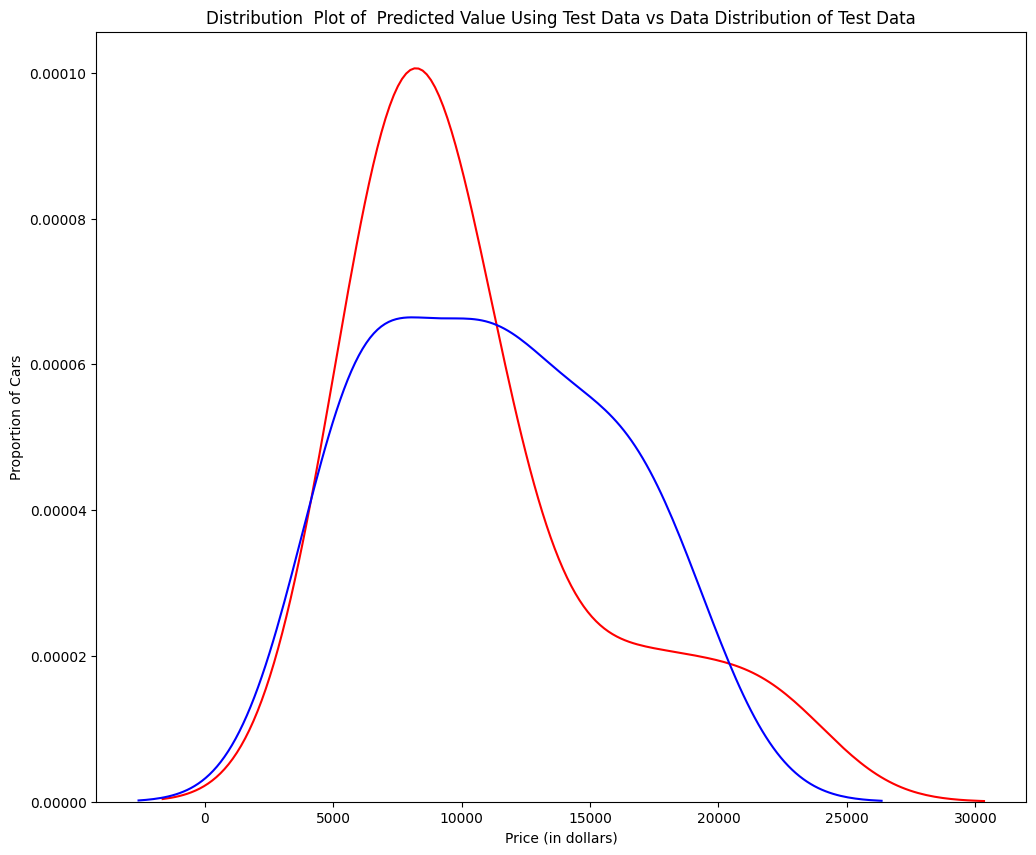

In [104]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different.

In [105]:
#lets see if polynomial regression also exhbits a drop in the prediction accuracy when analysing the test dataset
from sklearn.preprocessing import PolynomialFeatures

**Overfitting**

Overfitting occurs when the model fits the noise, but not the underlying process.

In [106]:
#lets crate a degree 5 polynomial model
#we will use 55% of the data for training and the rest for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [108]:
# we will perfom a degree 5  polynomial transformation on the feature 'horsepower'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr



PolynomialFeatures(degree=5)

In [110]:
#we then create a Linear Regression model 'poly' and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [111]:
#we can then see the output of our model using the method 'predict' , we assign the value 'yhat'
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [112]:
#lets take the fist five predicted values and comapre it toe the actual targets
print('Predicted values:', yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


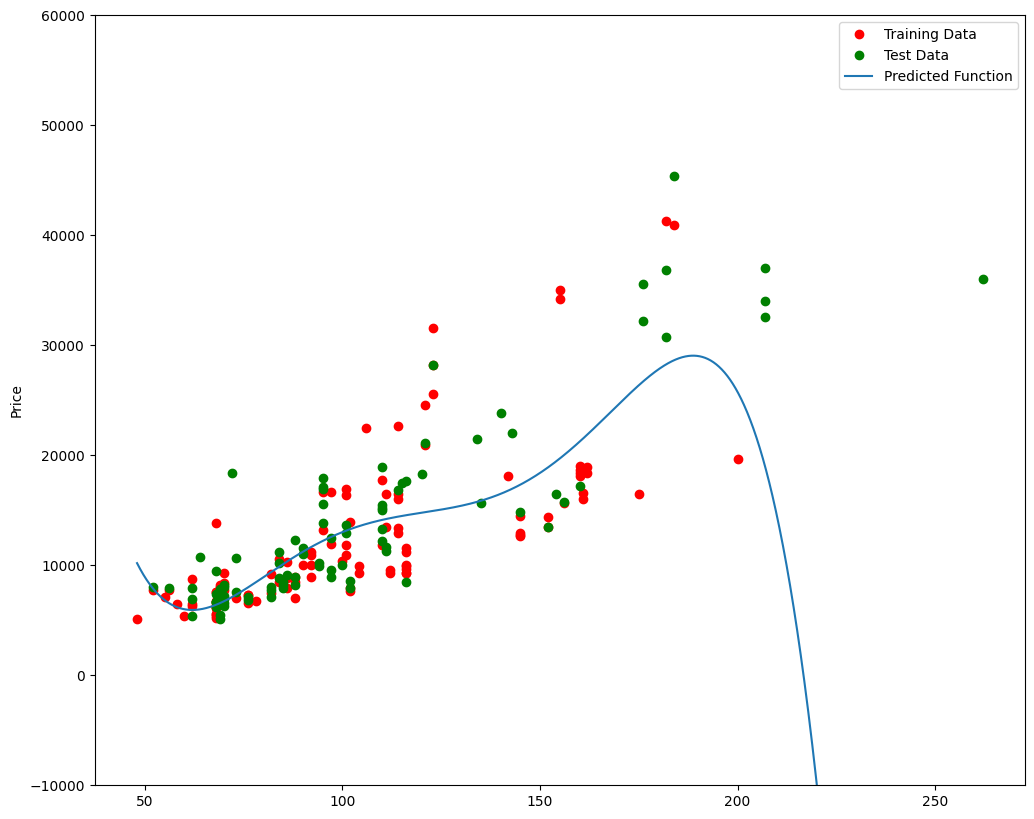

In [114]:
#we use 'PollyPlot" to display the training data, testing data, and the predicted function
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

We see that the estimated function apppears to track the data but around 200 horsepower, the function begines to diverge from he data points

In [116]:
#R^2 of the training data
poly.score(x_train_pr, y_train)

0.5567716902120254

In [117]:
#R^2 of the test data
poly.score(x_test_pr, y_test)

-29.871340302043684

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2 ')

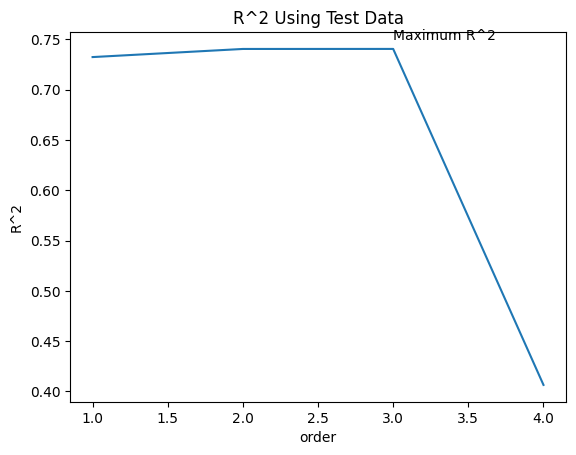

In [118]:
#let's see how R^2 changes on the test data for different order polynomials and then plot the results
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train[['horsepower']])

    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr.fit(x_train_pr, y_train)

    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

In [119]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train,y_test, poly, pr)

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

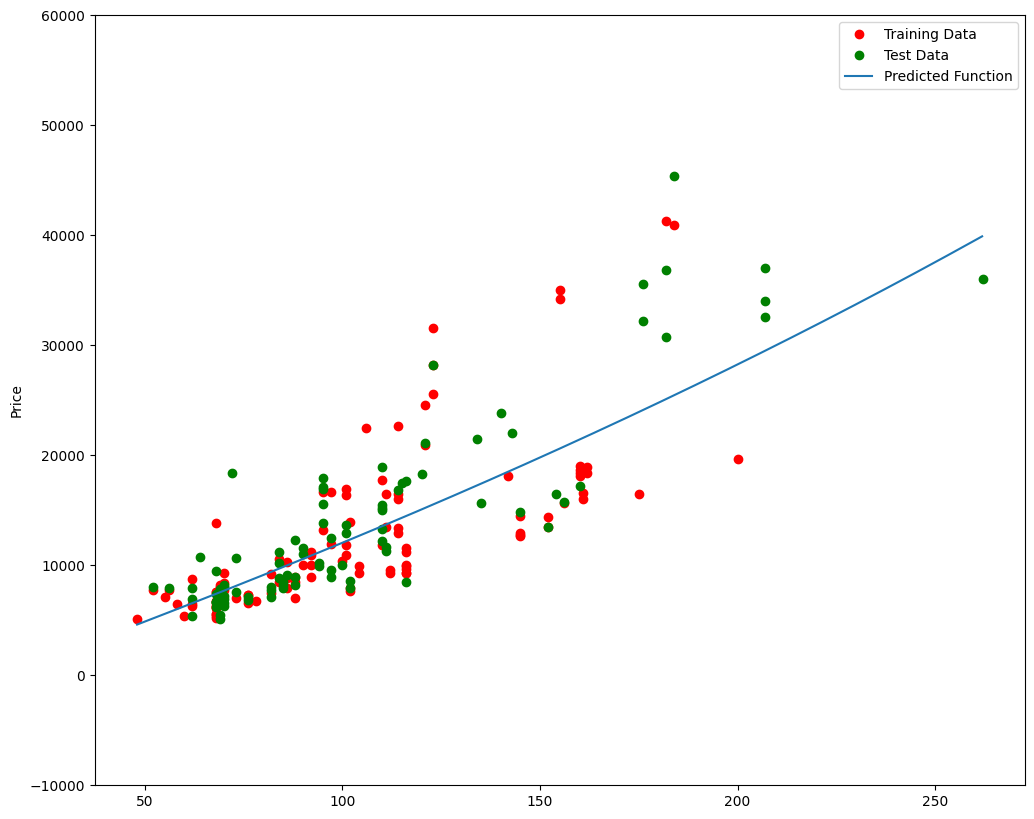

In [120]:
interact(f, order=(0,6,1), test_data=(0.05, 0.95, 0.05))

In [122]:
#lets creat a PolynooalFeatures object 'pr1' of degree two
pr1=PolynomialFeatures(degree=2)

In [124]:
# we transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [125]:
# we check the dimensions the new feature have
x_train_pr1.shape

(110, 15)

In [126]:
#lets create a linear regression model 'poly1'
poly1=LinearRegression().fit(x_train_pr1, y_train)

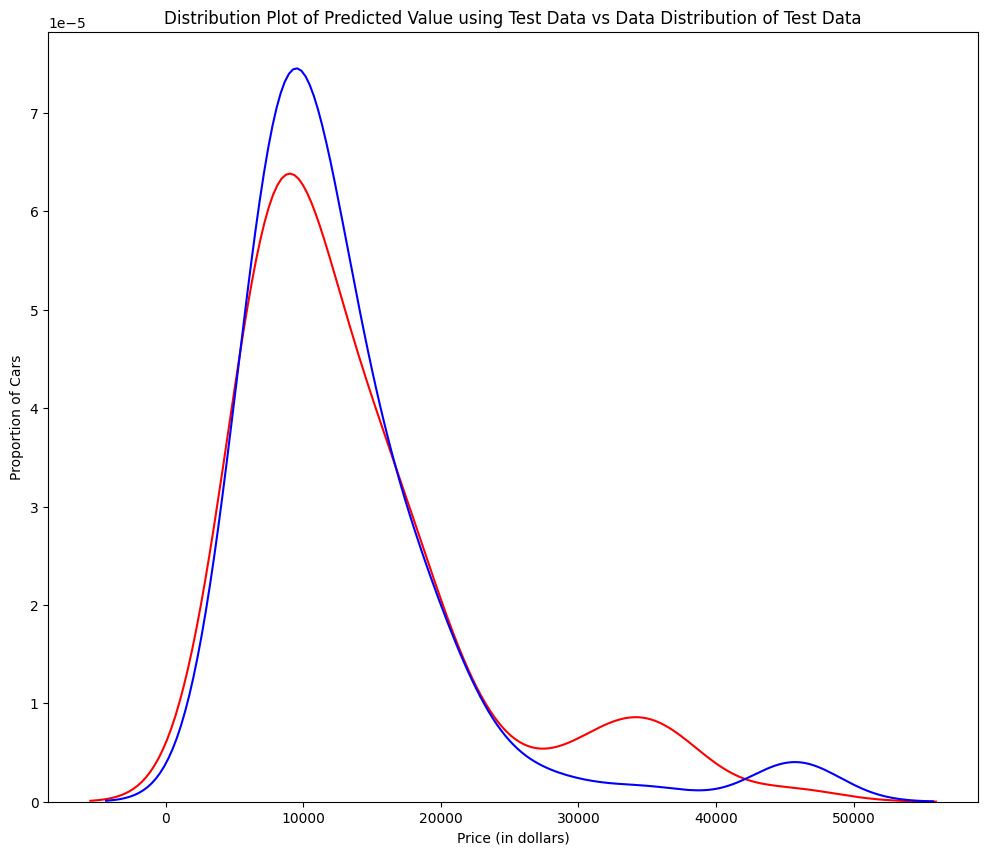

In [127]:
#we then use 'predict' to predict an output on the polynomial features the use 'DistributionPlot to display the distribution of the predicted test output vs the actual test data
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution Plot of Predicted Value using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual; Values (Test)", "Predicted values(Test)", Title)

The predicted value is hgher than the actual valu for cars where the price $10, 000 range, convesely the predicted price is lower thhan the price cost in the $30, 000 to $40, 000 range. As such he model is not as accurate in these ranges.

**Ridge Regression**

In [129]:
#lets perfom a degree two polynomail transformation o our data
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [130]:
#lets import Ridge from the module linear models
from sklearn.linear_model import Ridge

In [131]:
#lets create a Ridge regression object, setting the regularization parameter(alpha) to 1
RidgeModel=Ridge(alpha=1)


In [132]:
#Lets fit the model
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [133]:
#we can also obtain a prediction
yhat = RidgeModel.predict(x_test_pr)

In [134]:
#we can compare the fisrt four predicted samples to our test set
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error.

In [135]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:06<00:00, 144.66it/s, Test Score=0.564, Train Score=0.859]


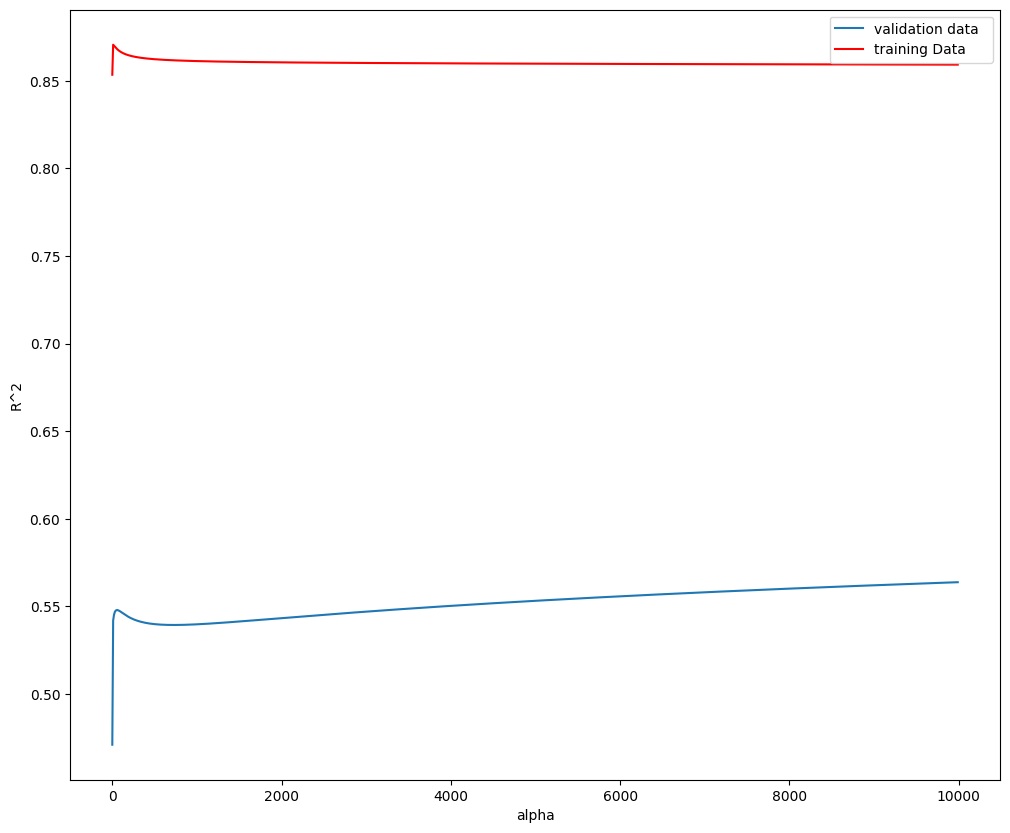

In [136]:
#We can plot out the value of R^2 for different alphas
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

In [137]:
RigeModel = Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206506

**Grid Search**

In [138]:
#lets import GridSearchCV from the module model_selection
from sklearn.model_selection import GridSearchCV

In [140]:
#we create a dictionary of parameter values
parameters1= [{'alpha' : [ 0.001, 0.1,1,10,100, 1000,10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [141]:
#create a Ridge regression object
RR=Ridge()
RR

Ridge()

In [142]:
#create a ridge grid search object
Grid1= GridSearchCV(RR, parameters1,cv=4)

In [145]:
#fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [147]:
#We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [148]:
#lets test our model on the test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

In [149]:
#lets perfom a grid search for the alpha parameter and the normalization parameter then find the best values of the parameters
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)